In [ ]:
#### Add for each output file it's match label - lavel list is foind on "run selector" :  ####
#### https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA736966&f=disease_sam_ss%3An%3Auc%2Ccontrol%3Ac&o=acc_s%3Aa ####

import os
import pandas as pd
'''
# Paths
csv_path = "SraColitisLabel.csv"
files_path = "/dsi/sbm/linoym/oracle_cloud/algo_results"

# Read the CSV file
df = pd.read_csv(csv_path, usecols=["Run", "disease"])

# Convert the CSV data into a dictionary for fast lookup
run_to_label = dict(zip(df["Run"], df["disease"]))

# Process each file in the directory
for file_name in os.listdir(files_path):
    if file_name.startswith("CDR3_results_SRR") and file_name.endswith(".txt"):
        # Extract the ID from the file name
        file_id = file_name.split("_SRR")[1].split(".txt")[0]  # Extract the "SRRxxxxx" part
        
        # Find the corresponding label
        label = run_to_label.get(f"SRR{file_id}")
        
        if label:
            # Construct the new file name
            new_file_name = f"CDR3_results_SRR{file_id}_{label}.txt"
            
            # Rename the file
            old_file_path = os.path.join(files_path, file_name)
            new_file_path = os.path.join(files_path, new_file_name)
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {file_name} -> {new_file_name}")
        else:
            print(f"No matching label found for: {file_name}")

'''


Renamed: CDR3_results_SRR14788068.txt -> CDR3_results_SRR14788068_UC.txt
Renamed: CDR3_results_SRR25927193.txt -> CDR3_results_SRR25927193_UC.txt
Renamed: CDR3_results_SRR14788174.txt -> CDR3_results_SRR14788174_UC.txt
Renamed: CDR3_results_SRR14788163.txt -> CDR3_results_SRR14788163_UC.txt
Renamed: CDR3_results_SRR25927183.txt -> CDR3_results_SRR25927183_UC.txt
Renamed: CDR3_results_SRR14787841.txt -> CDR3_results_SRR14787841_Control.txt
Renamed: CDR3_results_SRR14788167.txt -> CDR3_results_SRR14788167_UC.txt
Renamed: CDR3_results_SRR14788147.txt -> CDR3_results_SRR14788147_UC.txt
Renamed: CDR3_results_SRR25927529.txt -> CDR3_results_SRR25927529_Control.txt
Renamed: CDR3_results_SRR25927504.txt -> CDR3_results_SRR25927504_UC.txt
Renamed: CDR3_results_SRR14787938.txt -> CDR3_results_SRR14787938_Control.txt
Renamed: CDR3_results_SRR25927182.txt -> CDR3_results_SRR25927182_UC.txt
Renamed: CDR3_results_SRR25927165.txt -> CDR3_results_SRR25927165_UC.txt
Renamed: CDR3_results_SRR14788127.tx

In [1]:
#### Pre-proceesing for cdr3 sequnces ###

import os
import pandas as pd

''' This section go over all the cdr3 results (from each fastq sample) and concat it to one list and save then name file for each sequnce near by '''

# Define the directory containing your files
WORK_DIR = f'/dsi/sbm/linoym/oracle_cloud/algo_results'

# Initialize dictionaries to hold DataFrames for each label
data_label = {'PSCUC': [], 'PSC': [], 'Control': [], 'UC': []}

# Iterate over all files in the directory that start with "CDR3_results" and sre txt file. Those file are ooutputs from Tmer algo.
for filename in os.listdir(WORK_DIR):
    if filename.startswith('CDR3_results') and filename.endswith('.txt'):
        if '_PSCUC' in filename:
            label = 'PSCUC'
        elif '_PSC' in filename:
            label = 'PSC'
        elif '_Control' in filename:
            label = 'Control'
        elif '_UC' in filename:
            label = 'UC'
        else:
            continue
        
        # Load the file into a DataFrame
        filepath = os.path.join(WORK_DIR, filename)
        cdr_from_file_df = pd.read_csv(filepath, header=None, names=['CDR3_sequence'])  # No header, add header named 'CDR3_sequence'
        cdr_from_file_df['source_file'] = filename
        
        # Append the DataFrame to the appropriate list
        data_label[label].append(cdr_from_file_df)

for label, cdr3_df in data_label.items():
    if cdr3_df:
        combined_df = pd.concat(cdr3_df, ignore_index=True)
        ###output_filename = os.path.join(WORK_DIR, f'combined_CDR3_{label}.csv')
        ###combined_df.to_csv(output_filename, sep='\t', index=False, header=True)
        ###print(f"Saved concatenated file for {label} to {output_filename}")

print("Concatenation complete.")


''' This section is response to combined 4 dfs: Control,PSCUC,PSC,UC and Control  to one file '''

# Combine all subtype DataFrames into one
combined_dataframes = []
for label, cdr3_df in data_label.items():
    if cdr3_df:
        cdr3_label_df = pd.concat(cdr3_df, ignore_index=True)
        combined_dataframes.append(cdr3_label_df)
# Concatenate all DataFrames in the list into a single DataFrame
all_cdr3_df = pd.concat(combined_dataframes, ignore_index=True)
combined_output_filename = os.path.join(WORK_DIR, 'All_combined_CDR3.csv')
all_cdr3_df.to_csv(combined_output_filename, sep=',', index=True, header=True)
all_cdr3_df.head()




The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Concatenation complete.


,CDR3_sequence,source_file
0,CASSDGYR,CDR3_results_SRR14787985_Control.txt
1,CASPSPFF,CDR3_results_SRR14787985_Control.txt
2,GGGGKLIF,CDR3_results_SRR14787985_Control.txt
3,CASSLEHTE,CDR3_results_SRR14787985_Control.txt
4,CSVGTYTF,CDR3_results_SRR14787985_Control.txt


In [2]:
import pandas as pd
###### read an process data to clusTCR ######

sequences_path = f'/dsi/sbm/linoym/oracle_cloud/algo_results/All_combined_CDR3.csv'
sequences_df = pd.read_csv(sequences_path)
# save only UC and Control labels
sequences_df = sequences_df[sequences_df['source_file'].str.contains('_UC.txt|_Control.txt')].reset_index()
# remove unneccary columns
sequences_df = sequences_df.drop(columns=['index', 'Unnamed: 0'])
sequences_df

,CDR3_sequence,source_file
0,CASSDGYR,CDR3_results_SRR14787985_Control.txt
1,CASPSPFF,CDR3_results_SRR14787985_Control.txt
2,GGGGKLIF,CDR3_results_SRR14787985_Control.txt
3,CASSLEHTE,CDR3_results_SRR14787985_Control.txt
4,CSVGTYTF,CDR3_results_SRR14787985_Control.txt
...,...,...
209465,CASSLHRG,CDR3_results_SRR25927449_UC.txt
209466,CASSLNGG,CDR3_results_SRR25927449_UC.txt
209467,CASSLLHF,CDR3_results_SRR25927449_UC.txt
209468,CASSLRLL,CDR3_results_SRR25927449_UC.txt


In [3]:
from clustcr import Clustering
from clustcr import ClusterAnalysis
import pandas as pd

########## This section use clusTCR library and try cluster all the sequnces ##########
print(f"number of sequences BEFORE clustering : {len(sequences_df['CDR3_sequence'])}")
print(f"number of unique sequences before clustering : {len(set(sequences_df['CDR3_sequence']))}\n")
clustering = Clustering()
cdr3 = sequences_df['CDR3_sequence']
output = clustering.fit(cdr3)


########## Merge all output data to one dataframe in order to work usefully ##########
# The "output.summary()" df contain only clustr number, size of the clustring group and the motif. The cluster is index and not column so i want to conver index to column in order to feature analysis.
df_summary_clustreing_group = output.summary().reset_index()
df_summary_clustreing_group.rename(columns={'index': 'cluster'}, inplace=True)
# Merge the "output.clusters_df" the contain sequnce and cluster group with "df_summary_clustreing_group" in order to present to each sequncse also it's motif.
clustring_results_all_data = pd.merge(output.clusters_df, df_summary_clustreing_group, on='cluster', how='left')
print(clustring_results_all_data)


/home/ls/linoym/.conda/envs/my_algo/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


number of sequences BEFORE clustering : 209470
number of unique sequences before clustering : 20624

Clustering 209470 TCRs using two-step approach.
Total time to run ClusTCR: 7.637s
      junction_aa cluster  size         motif
0        CASSLLIF       0    24      CASSLLFF
1        CASSLLVF       0    24      CASSLLFF
2        CASSLIFF       0    24      CASSLLFF
3        CASSLVFF       0    24      CASSLLFF
4        CASSFLFF       0    24      CASSLLFF
...           ...     ...   ...           ...
63054   GTENSPLHF   11557     2  G[RT]ENSPLHF
63055    RASSLIAL   11558     2   RASSLI[AS]L
63056    RASSLISL   11558     2   RASSLI[AS]L
63057    RASSLSTS   11559     2   RASSL[ST]TS
63058    RASSLTTS   11559     2   RASSL[ST]TS

[63059 rows x 4 columns]


In [4]:
####### merge cluster results with original sequences #######
sequences_df = pd.merge(clustring_results_all_data, sequences_df, left_on='junction_aa',right_on='CDR3_sequence', how='outer')
# remove sequences that have not cluster
sequences_df = sequences_df.dropna()
sequences_df

,junction_aa,cluster,size,motif,CDR3_sequence,source_file
0,CASSLLIF,0,24.0,CASSLLFF,CASSLLIF,CDR3_results_SRR25927464_UC.txt
1,CASSLLIF,0,24.0,CASSLLFF,CASSLLIF,CDR3_results_SRR14788051_UC.txt
2,CASSLLIF,0,24.0,CASSLLFF,CASSLLIF,CDR3_results_SRR25927186_UC.txt
3,CASSLLIF,0,24.0,CASSLLFF,CASSLLIF,CDR3_results_SRR14788280_UC.txt
4,CASSLLIF,1,10.0,CASSLL.F,CASSLLIF,CDR3_results_SRR25927464_UC.txt
...,...,...,...,...,...,...
1010410,RASSLTTS,11559,2.0,RASSL[ST]TS,RASSLTTS,CDR3_results_SRR14787824_Control.txt
1010411,RASSLTTS,11559,2.0,RASSL[ST]TS,RASSLTTS,CDR3_results_SRR14787793_Control.txt
1010412,RASSLTTS,11559,2.0,RASSL[ST]TS,RASSLTTS,CDR3_results_SRR14788139_UC.txt
1010413,RASSLTTS,11559,2.0,RASSL[ST]TS,RASSLTTS,CDR3_results_SRR14788064_UC.txt


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

################ Calculate the proportion of clusters that represent each source_file ################
cluster_counts = sequences_df.groupby(['source_file', 'cluster']).size().unstack(fill_value=0)

# Convert from number to proportion
cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# Add a 'tag' column based on the index 'source_file'
cluster_proportions['tag'] = cluster_proportions.index.to_series().apply(
    lambda x: 'UC' if '_UC.txt' in x
              else 'Control' if '_Control.txt' in x
              else 'Unknown'
)

cluster_proportions

#cluster_proportions.to_csv('/dsi/sbm/linoym/oracle_cloud/algo_results/cluster_proportions.csv', index=False)


cluster,0,1,2,3,4,5,6,7,8,9,...,11551,11552,11553,11554,11555,11556,11557,11558,11559,tag
source_file,,,,,,,,,,,,,,,,,,,,,
CDR3_results_SRR14787784_Control.txt,0.000778,0.000000,0.000000,0.001556,0.0,0.000000,0.000000,0.000778,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR14787785_Control.txt,0.000674,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000674,0.000000,0.000674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR14787786_Control.txt,0.000996,0.000000,0.000000,0.000000,0.0,0.000000,0.000996,0.000996,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR14787787_Control.txt,0.000000,0.000000,0.000000,0.000000,0.0,0.000963,0.000000,0.000963,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR14787788_Control.txt,0.000951,0.000951,0.000000,0.000000,0.0,0.000000,0.000000,0.001903,0.000951,0.000951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDR3_results_SRR25927668_Control.txt,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR25927669_Control.txt,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
CDR3_results_SRR25927670_Control.txt,0.002209,0.000000,0.000000,0.000736,0.0,0.000000,0.000000,0.001473,0.000000,0.000736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control


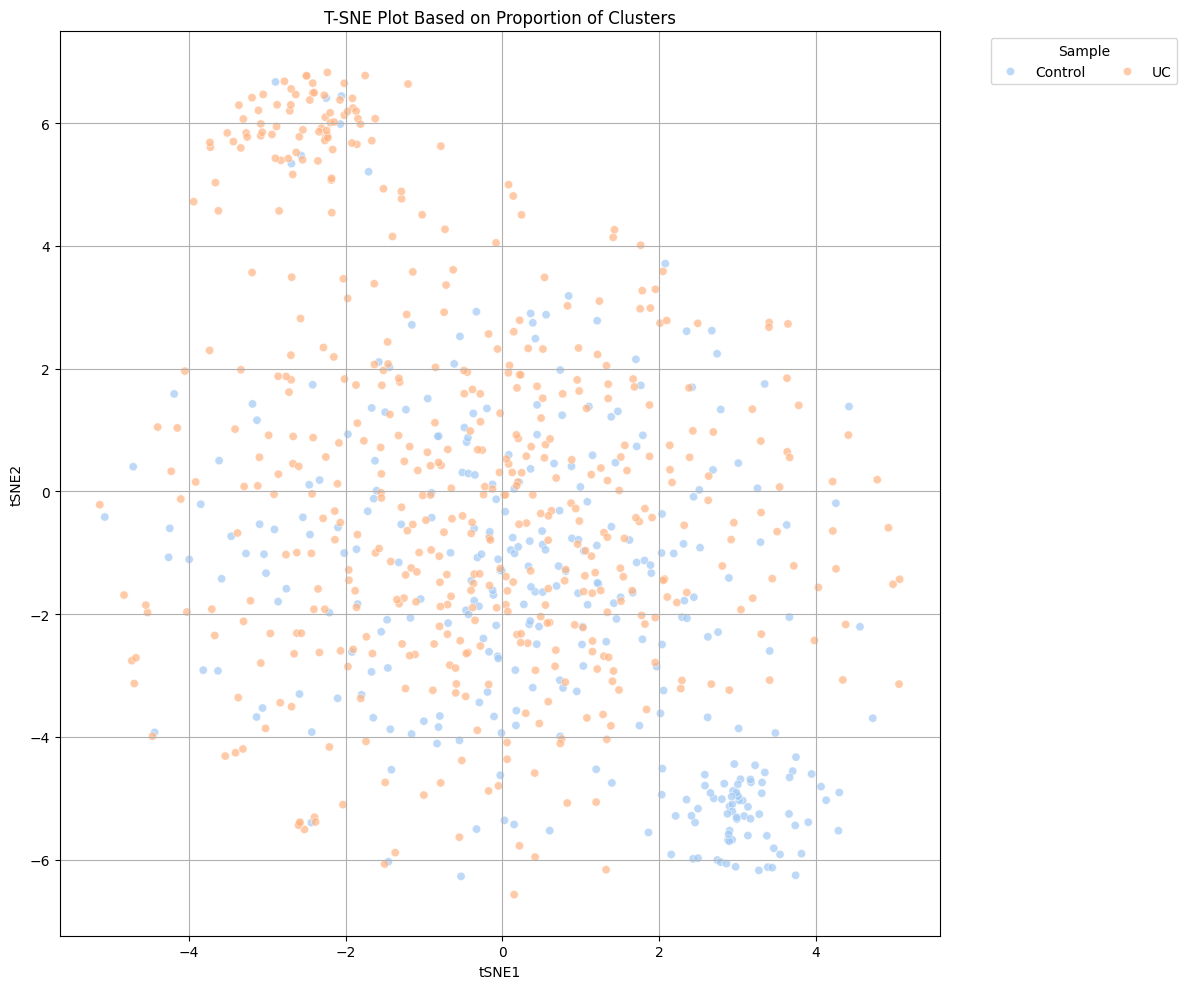

In [7]:
# Prepare data for t-SNE by dropping 'tag'
no_str_column = cluster_proportions.drop(columns=['tag'])

# Perform t-SNE on cluster proportions
tsne = TSNE(n_components=2, random_state=42)
reduced = tsne.fit_transform(no_str_column)

# Create a DataFrame with t-SNE results and the 'tag' column
tsne_df = pd.DataFrame(reduced, columns=['tSNE1', 'tSNE2'])
tsne_df['tag'] = cluster_proportions['tag'].values  # Add the 'tag' column for plotting

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(12, 10))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='tag', data=tsne_df, palette='pastel', alpha=0.7)
#sns.scatterplot(x='tSNE1', y='tSNE2', hue='tag', data=tsne_df, palette=sns.husl_palette(2), alpha=0.7)

# Add titles and labels
plt.title('T-SNE Plot Based on Proportion of Clusters')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Sample', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
# Read the data. The header columns represent cluster numbers, and the cells show the cluster proportions within each class
cluster_proportions_df = pd.read_csv("/dsi/sbm/linoym/oracle_cloud/algo_results/cluster_proportions.csv")
cluster_proportions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11551,11552,11553,11554,11555,11556,11557,11558,11559,tag
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
1,0.000674,0.000674,0.000674,0.000674,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
4,0.000000,0.000000,0.000000,0.000951,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control


In [3]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# 1) Shuffle the data to prevent the model from learning unintended patterns or biases during training.
cluster_proportions_df = shuffle(cluster_proportions_df, random_state=42)
# Remove tag\label column
data_cluster_proportions = cluster_proportions_df.drop(columns=['tag']) 

# 2) Convert categorical labels to numerical value
le =LabelEncoder()
label = le.fit_transform(cluster_proportions_df['tag'])

In [4]:
#num_rows = len(cluster_proportions_df)
#num_rows
label

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [46]:
from atom import ATOMClassifier
atom = ATOMClassifier(data_cluster_proportions, label, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (815, 11561)
Train set size: 652
Test set size: 163
-------------------------------------
Memory: 75.38 MB
Scaled: False
Outlier values: 135875 (1.8%)



In [47]:
# Create a new branch
atom.feature_selection(strategy="sfm", solver="xgb", n_features=100)

Fitting FeatureSelector...
Performing feature selection ...
 --> Feature 427 was removed due to collinearity with another feature.
 --> Feature 4492 was removed due to collinearity with another feature.
 --> Feature 476 was removed due to collinearity with another feature.
 --> Feature 477 was removed due to collinearity with another feature.
 --> Feature 537 was removed due to collinearity with another feature.
 --> Feature 569 was removed due to collinearity with another feature.
 --> Feature 574 was removed due to collinearity with another feature.
 --> Feature 8590 was removed due to collinearity with another feature.
 --> Feature 9875 was removed due to collinearity with another feature.
 --> Feature 10254 was removed due to collinearity with another feature.
 --> Feature 1481 was removed due to collinearity with another feature.
 --> Feature 7847 was removed due to collinearity with another feature.
 --> Feature 10461 was removed due to collinearity with another feature.
 --> Fea

In [48]:
atom.X.columns

Index(['16', '29', '65', '78', '141', '172', '262', '381', '758', '880',
       '1563', '1569', '1650', '1800', '2151', '2305', '2445', '2539', '2578',
       '2579', '2603', '2644', '2648', '2727', '2734', '2741', '2804', '2894',
       '2925', '3295', '3471', '3478', '3524', '3561', '3656', '3795', '3858',
       '3925', '4054', '4629', '4687', '4747', '4748', '4859', '5109', '5170',
       '5172', '5173', '5189', '5342', '5378', '5420', '5556', '5618', '5639',
       '5651', '5652', '5686', '5713', '5809', '5899', '6116', '6145', '6205',
       '6335', '6381', '6918', '7196', '7248', '7326', '7361', '7380', '7410',
       '7487', '7501', '7535', '7557', '7674', '8056', '8748', '8840', '9093',
       '9332', '9336', '9379', '9484', '10542', '10566', '10587', '10695',
       '10731', '10937', '10941', '10947', '11020', '11028', '11230', '11306',
       '11417', '11486'],
      dtype='object')

In [50]:
#atom.winner.features
print(atom.X.columns)
print(f"Number of features that have been selected: {len(atom.X.columns)}")
data_feature_selection = cluster_proportions_df[atom.X.columns]
data_feature_selection

Index(['16', '29', '65', '78', '141', '172', '262', '381', '758', '880',
       '1563', '1569', '1650', '1800', '2151', '2305', '2445', '2539', '2578',
       '2579', '2603', '2644', '2648', '2727', '2734', '2741', '2804', '2894',
       '2925', '3295', '3471', '3478', '3524', '3561', '3656', '3795', '3858',
       '3925', '4054', '4629', '4687', '4747', '4748', '4859', '5109', '5170',
       '5172', '5173', '5189', '5342', '5378', '5420', '5556', '5618', '5639',
       '5651', '5652', '5686', '5713', '5809', '5899', '6116', '6145', '6205',
       '6335', '6381', '6918', '7196', '7248', '7326', '7361', '7380', '7410',
       '7487', '7501', '7535', '7557', '7674', '8056', '8748', '8840', '9093',
       '9332', '9336', '9379', '9484', '10542', '10566', '10587', '10695',
       '10731', '10937', '10941', '10947', '11020', '11028', '11230', '11306',
       '11417', '11486'],
      dtype='object')
Number of features that have been selected: 100


,16,29,65,78,141,172,262,381,758,880,...,10731,10937,10941,10947,11020,11028,11230,11306,11417,11486
196,0.000000,0.000746,0.000746,0.000000,0.000000,0.000746,0.000746,0.001493,0.001493,0.000000,...,0.000000,0.000746,0.001493,0.000000,0.000000,0.000746,0.000000,0.000746,0.000000,0.0
299,0.000548,0.000000,0.000548,0.000548,0.001095,0.000000,0.000548,0.000548,0.000548,0.000000,...,0.000000,0.000548,0.000548,0.002738,0.001095,0.000548,0.000000,0.000548,0.000548,0.0
388,0.000000,0.001299,0.001299,0.001299,0.000000,0.000000,0.001299,0.000000,0.001299,0.001299,...,0.000000,0.000000,0.000000,0.002597,0.001299,0.001299,0.000000,0.000000,0.001299,0.0
227,0.000000,0.002361,0.001181,0.001181,0.000000,0.000000,0.001181,0.001181,0.001181,0.000000,...,0.001181,0.001181,0.001181,0.001181,0.000000,0.001181,0.000000,0.000000,0.001181,0.0
664,0.000000,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.001422,0.001422,0.000711,...,0.000000,0.000711,0.000711,0.001422,0.000711,0.000711,0.000000,0.000000,0.000711,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000000,0.000731,0.000731,0.000731,0.000000,0.000731,0.000731,0.000731,0.001462,0.000000,...,0.000000,0.002193,0.000731,0.000731,0.000000,0.000731,0.000000,0.000000,0.000731,0.0
106,0.000000,0.001747,0.000873,0.000873,0.000000,0.001747,0.000000,0.000873,0.002620,0.000000,...,0.000000,0.000873,0.000873,0.000873,0.000873,0.000873,0.000000,0.000000,0.000873,0.0
270,0.000524,0.001047,0.001571,0.001047,0.000000,0.000524,0.000524,0.000524,0.002094,0.000000,...,0.000000,0.000524,0.001047,0.001047,0.000524,0.000524,0.000000,0.000524,0.000524,0.0
435,0.000000,0.000814,0.000814,0.000814,0.000000,0.000000,0.000814,0.001629,0.001629,0.000000,...,0.000000,0.000814,0.000814,0.000814,0.000000,0.000814,0.000814,0.000000,0.000814,0.0


In [51]:
duplicates = data_feature_selection[data_feature_selection.duplicated()]

In [52]:
atom.run(
   models=["LR", "RF", "XGB"],
   metric="precision",
   n_bootstrap=4,
)


Training ========================= >>
Models: LR, RF, XGB
Metric: precision


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> precision: 0.8806
Test evaluation --> precision: 0.6975
Time elapsed: 0.060s
Bootstrap ---------------------------------------
Evaluation --> precision: 0.6755 ± 0.0217
Time elapsed: 0.103s
-------------------------------------------------
Total time: 0.163s


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> precision: 1.0
Test evaluation --> precision: 0.6475
Time elapsed: 0.341s
Bootstrap ---------------------------------------
Evaluation --> precision: 0.6619 ± 0.0118
Time elapsed: 1.092s
-------------------------------------------------
Total time: 1.433s


Results for XGBoost:
Fit ---------------------------------------------
Train evaluation --> precision: 1.0
Test evaluation --> precision: 0.6641
Time elapsed: 0.738s
Bootstrap --------------------------

In [53]:
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
LR,0.6380,0.6829,0.6109,0.7122,0.5530,0.2271,0.6887,0.7374,0.6379
RF,0.6442,0.6438,0.5855,0.7456,0.5944,0.2056,0.6589,0.8586,0.5717
XGB,0.6258,0.6572,0.5814,0.7189,0.5612,0.1779,0.6610,0.7879,0.5956


In [54]:
atom.evaluate(dataset="train")

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
LR,0.8497,0.8516,0.8431,0.8759,0.7793,0.6853,0.8782,0.8737,0.8532
RF,0.9126,1.0000,0.9018,0.9297,0.8687,0.8158,0.9084,0.9520,1.0000
XGB,0.8972,1.0000,0.8885,0.9166,0.8460,0.7834,0.9042,0.9293,1.0000
